## importing the needed packages

In [64]:
import pandas as pd;
import numpy as np;
import sklearn as sk;
import matplotlib as mtl;
import matplotlib.pyplot as plt

## readind the data set

In [6]:
data_1=pd.read_excel("../Data_Train.xlsx")

In [7]:
data_1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


now lets deal with the missing values in the data

In [8]:
#to get a quick overview of the dataset
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
#from the info itself it is clear that route,totalstops hav some missinf values.Lets get a clear picture
data_1.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#the isnull() function return true if the data is missing,else false,We can use sum() to get the number of mssing values as:
data_1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
#we see route and total stops have one missing values.And a common practice is that if the missing value percentage is less than 5 you can delete those values
#just check the row which has the missing values
data_1[data_1['Total_Stops'].isnull()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
#observe this is the row where route and totalstops are have missinf values.So lets drop this row
data_1.dropna(inplace=True)

In [15]:
data_1.info()
#now we can observe there is no missing values

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


## Data Preprocessing

In [16]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [24]:
#observe the data_of_journey,arrivaltime,departure time is of object data type.But they must be of  datetime data type.So lets create a function to convert all these three coulmns datatype to datetime

def convert_to_dt(col):
    data_1[col]=pd.to_datetime(data_1[col])

In [25]:
#now us the function to convert those three

for i in ['Date_of_Journey','Arrival_Time','Dep_Time']:
    convert_to_dt(i)

In [26]:
data_1.info()
#niw we can see the datatype has been changed to datetime

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [39]:
#now the date_of_journey column have dd/mm/yyyy format.which is not undertstandable to machine.So we must divide the datacolumn to date,month and year

#to include new column with name day
data_1['day_of_journey']=data_1['Date_of_Journey'].dt.day

In [42]:
#to include new column with month 
data_1['month_of_journey']=data_1['Date_of_Journey'].dt.month

In [43]:
#to incude new column with year
data_1['year_of_journey']=data_1['Date_of_Journey'].dt.year

In [44]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10682 non-null  object        
 1   Date_of_Journey   10682 non-null  datetime64[ns]
 2   Source            10682 non-null  object        
 3   Destination       10682 non-null  object        
 4   Route             10682 non-null  object        
 5   Dep_Time          10682 non-null  datetime64[ns]
 6   Arrival_Time      10682 non-null  datetime64[ns]
 7   Duration          10682 non-null  object        
 8   Total_Stops       10682 non-null  object        
 9   Additional_Info   10682 non-null  object        
 10  Price             10682 non-null  int64         
 11  day_of_journey    10682 non-null  int32         
 12  month_of_journey  10682 non-null  int32         
 13  year_of_journey   10682 non-null  int32         
dtypes: datetime64[ns](3), int32

In [45]:
#now we have the column with day,month and year
data_1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-28 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-28 05:50:00,2024-06-28 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-28 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-06-28 18:05:00,2024-06-28 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-06-28 16:50:00,2024-06-28 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [46]:
#now we must do the data cleaning process for deptime and arrivaltime.The date in those two columns must be deleted as it is of no importance because we have journey date details.So we have extract the hour and minute
#we make function for this

def hour_and_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_min']=df[col].dt.minute

In [47]:
for i in ['Dep_Time','Arrival_Time']:
    hour_and_min(data_1,i)

In [50]:
#now we ahve created columns for time and minutes
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Airline            10682 non-null  object        
 1   Date_of_Journey    10682 non-null  datetime64[ns]
 2   Source             10682 non-null  object        
 3   Destination        10682 non-null  object        
 4   Route              10682 non-null  object        
 5   Dep_Time           10682 non-null  datetime64[ns]
 6   Arrival_Time       10682 non-null  datetime64[ns]
 7   Duration           10682 non-null  object        
 8   Total_Stops        10682 non-null  object        
 9   Additional_Info    10682 non-null  object        
 10  Price              10682 non-null  int64         
 11  day_of_journey     10682 non-null  int32         
 12  month_of_journey   10682 non-null  int32         
 13  year_of_journey    10682 non-null  int32         
 14  Dep_Time_ho

In [49]:
data_1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-28 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-28 05:50:00,2024-06-28 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-28 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-06-28 18:05:00,2024-06-28 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-06-28 16:50:00,2024-06-28 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [52]:
#now we can drop the dep_time and arrivltime columns
data_1.drop(['Dep_Time','Arrival_Time'],axis=1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


## Now lets do the data analysis

In [53]:
#for safety lets store the cleaned data to another variable
data_cleaned=data_1

In [56]:
#now lets think in this lineo f way.When will the most of the flight will take off.You can go with to check the takeof number in seasons,in certain year interval.But lets start from the basics.Lets check the takeoff numbe in morning,evening,night etc
#for that we must derive it from the dep_time_hour column
#lets create funcion for that

def flight_daycount(x):
    if(x>4 and x<=8 ):
        return "early morning"
    elif (x>8 and x<=12):
        return "morning"
    elif (x>12 and x<=16):
          return "noon"
    elif (x>16 and x<=20):
         return "evening"
    elif (x>20 and x<=24):
         return "night"
    else:
         return "late night"



In [59]:
#now lets apply this fuunction in out departure time 
flightcount=data_1['Dep_Time_hour'].apply(flight_daycount)
flightcount

0                night
1        early morning
2              morning
3              evening
4                 noon
             ...      
10678          evening
10679          evening
10680    early morning
10681          morning
10682          morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [61]:
#now let take a count of this
flightcountplot=flightcount.value_counts()
flightcountplot

Dep_Time_hour
early morning    2880
evening          2357
morning          2209
noon             1731
night            1040
late night        465
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

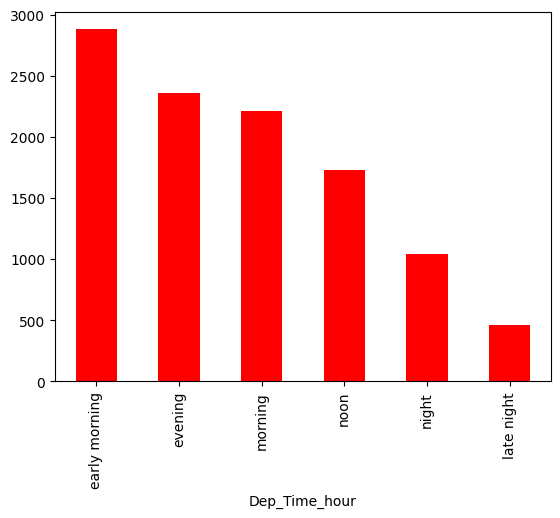

In [62]:
#now lets plot it with suitable chart.I prefer bar chart here
flightcountplot.iplot(kind="bar",color="red")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


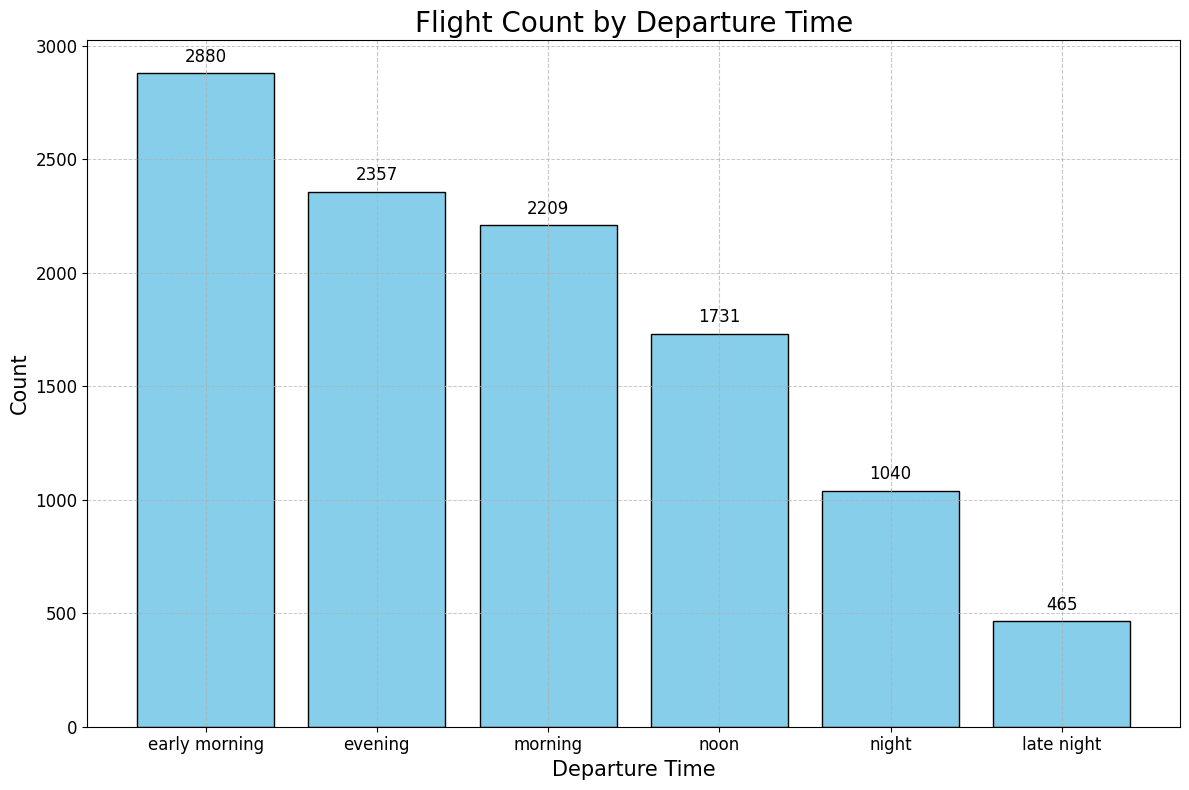

In [71]:
#if you want to make the charts more interactive then follow the codes.else just skip it.

%pip install matplotlib mplcursors
import matplotlib.pyplot as plt
import mplcursors
import pandas as pd

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(flightcountplot.index, flightcountplot.values, color='skyblue', edgecolor='black')

# Add title and labels
ax.set_title('Flight Count by Departure Time', fontsize=20)
ax.set_xlabel('Departure Time', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', fontsize=12)

# Add hover functionality to display counts
cursor = mplcursors.cursor(bars, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f'Count: {int(sel.target[1])}'))

# Customize ticks and grid
ax.tick_params(axis='both', which='major', labelsize=12)
ax.yaxis.grid(True, linestyle='--', linewidth=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [72]:
#now analyse the duaration column.Some have h and minute but some data have only minute.So lets clean it
#we must convert all the data in [hour,minute fromat].So lets design a function

def duartion_formating(x):
    if 'h' not in x:
        x='0h' + ' ' + x
    elif 'm' not in x:
        x=x + ' ' + '0m'
    
    return x

In [73]:
durationformat=data_1['Duration'].apply(duartion_formating)
durationformat

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [74]:
#now lets update the duration column

data_1['Duration']=durationformat

In [76]:
data_1['Duration']
#Now the duration is also standardized

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [81]:
#now we look at the departure time,minute etc they doesnt have any h or m with them.So lets try to convert this duartion by removing the h and m 

#for that we use split function.using space as the demiliter we can split the duration into two.and using the array indexing we can extract the say 2 from h and 50 from m

data_1['Duration_hours']=data_1['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1])) #this to etxract number from hand make it int type
data_1['Duration_minutes']=data_1['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1])) #this is to extract number from m and make it int type
data_1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,year_of_journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-28 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-28 05:50:00,2024-06-28 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-28 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-06-28 18:05:00,2024-06-28 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-06-28 16:50:00,2024-06-28 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


list